# Mutual Information: ตรวจหารูปแบบในข้อมูล

1. Entropy: วัดความไม่แน่นอนในข้อมูล

พิจารณาตัวแปรสุ่ม $X$ $$H(X) = -\sum_{x\in X} p(x)\log(p(x))$$

2. Joint Entropy: วัดความไม่แน่นอนของข้อมูลสองตัวแปร

พิจารณาตัวแปรสุ่ม $X$ และ $Y$ $$H(X, Y) = -\sum_{x\in X}\sum_{y\in Y} p(x, y)\log(p(x, y))$$

3. Conditional Entropy: การวัดความไม่แน่นอนภายใต้เงื่อนไขบางอย่าง

พิจารณาตัวแปรสุ่ม $X$ และ $Y$ $$H(X | Y) = -\sum_{i=1}^n p(x_i)\log(p(x_i))$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Set Seaborn style
import seaborn as sns
sns.set(style="whitegrid", palette="deep", context="notebook")

In [2]:
n = 1000
x = np.random.uniform(-1, 1, n) # input /  features
y = x ** 2 + 0.01 * np.random.randn(n) # output / labels

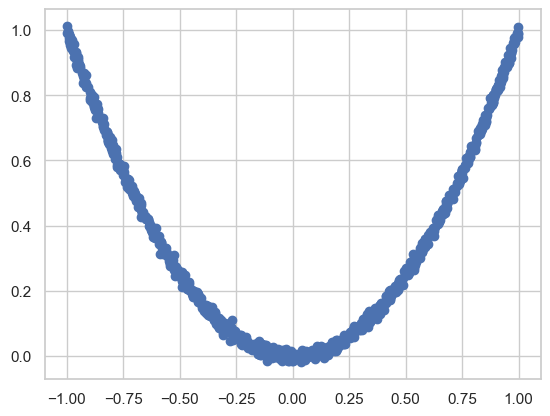

In [3]:
plt.scatter(x, y)

In [4]:
# entropy function
def entropy(p):
    """Entropy of a discrete probability distribution"""
    p = p[p > 0]
    return -np.sum(p * np.log(p))

# H(X)
def marginal_entropy(x, bins):
    hist, _ = np.histogram(x, bins=bins, density=False)
    p = hist / np.sum(hist)
    return entropy(p)

# H(X, Y)
def joint_entropy(x, y, bins):
    joint_hist, _, _ = np.histogram2d(x, y, bins=[bins, bins], density=False)
    joint_prob = joint_hist / np.sum(joint_hist)
    return entropy(joint_prob.ravel())

In [5]:
marginal_entropy(x, 100)

np.float64(4.5548169802176295)

In [6]:
marginal_entropy(y, 100)

np.float64(4.360764113449087)

## Mutual Information Equation

$$I(X;Y) = H(X) + H(Y) - H(X, Y)$$

In [7]:
def mutual_information(x, y, bins=100):
    # Compute marginal entropies
    H_x = marginal_entropy(x, bins)
    H_y = marginal_entropy(y, bins)

    # Compute joint entropy
    H_xy = joint_entropy(x, y, bins)

    # Compute MI
    I_xy = H_x + H_y - H_xy

    return I_xy

In [8]:
mutual_information(x, y)

np.float64(3.084288053995392)

In [9]:
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import pearsonr

In [10]:
def make_data():
    n = 1000
    x = np.random.uniform(-1, 1, n)
    datasets = [
        (x, x),                                       # Perfect linear
        (x, x + 0.3 * np.random.randn(n)),           # Noisy linear
        (x, x**2 + 0.1 * np.random.randn(n)),        # Quadratic
        (x, np.sin(np.pi * x)),                      # Sinusoidal
        (x, np.random.randn(n)),                     # Independent noise
        (x, np.abs(x)),                              # Absolute value
        (x, np.sign(x)),                             # Step function
        (x, x + np.random.normal(0, 2, n)),          # Very noisy linear
        (x, x**3),                                    # Cubic
        (x, -x),                                      # Negative correlation
        (x, np.cos(np.pi * x)),                      # Cosine
        # Circular relationship
        (np.cos(2 * np.pi * x), np.sin(2 * np.pi * x)),
        # Crossed lines
        (x, x * np.random.choice([-1, 1], size=n)),
        # Ellipse
        (x, 0.5 * x + 0.5 * np.sqrt(1 - x**2)),
        # X shape
        (np.sign(x) * np.sqrt(np.abs(x)), x)
    ]
    return datasets

In [11]:
# Compute metrics
def compute_metrics(x, y):
    x_ = x.reshape(-1, 1)
    pearson = pearsonr(x, y)[0]
    mi = mutual_info_regression(x_, y, discrete_features=False)[0]
    return pearson, mi

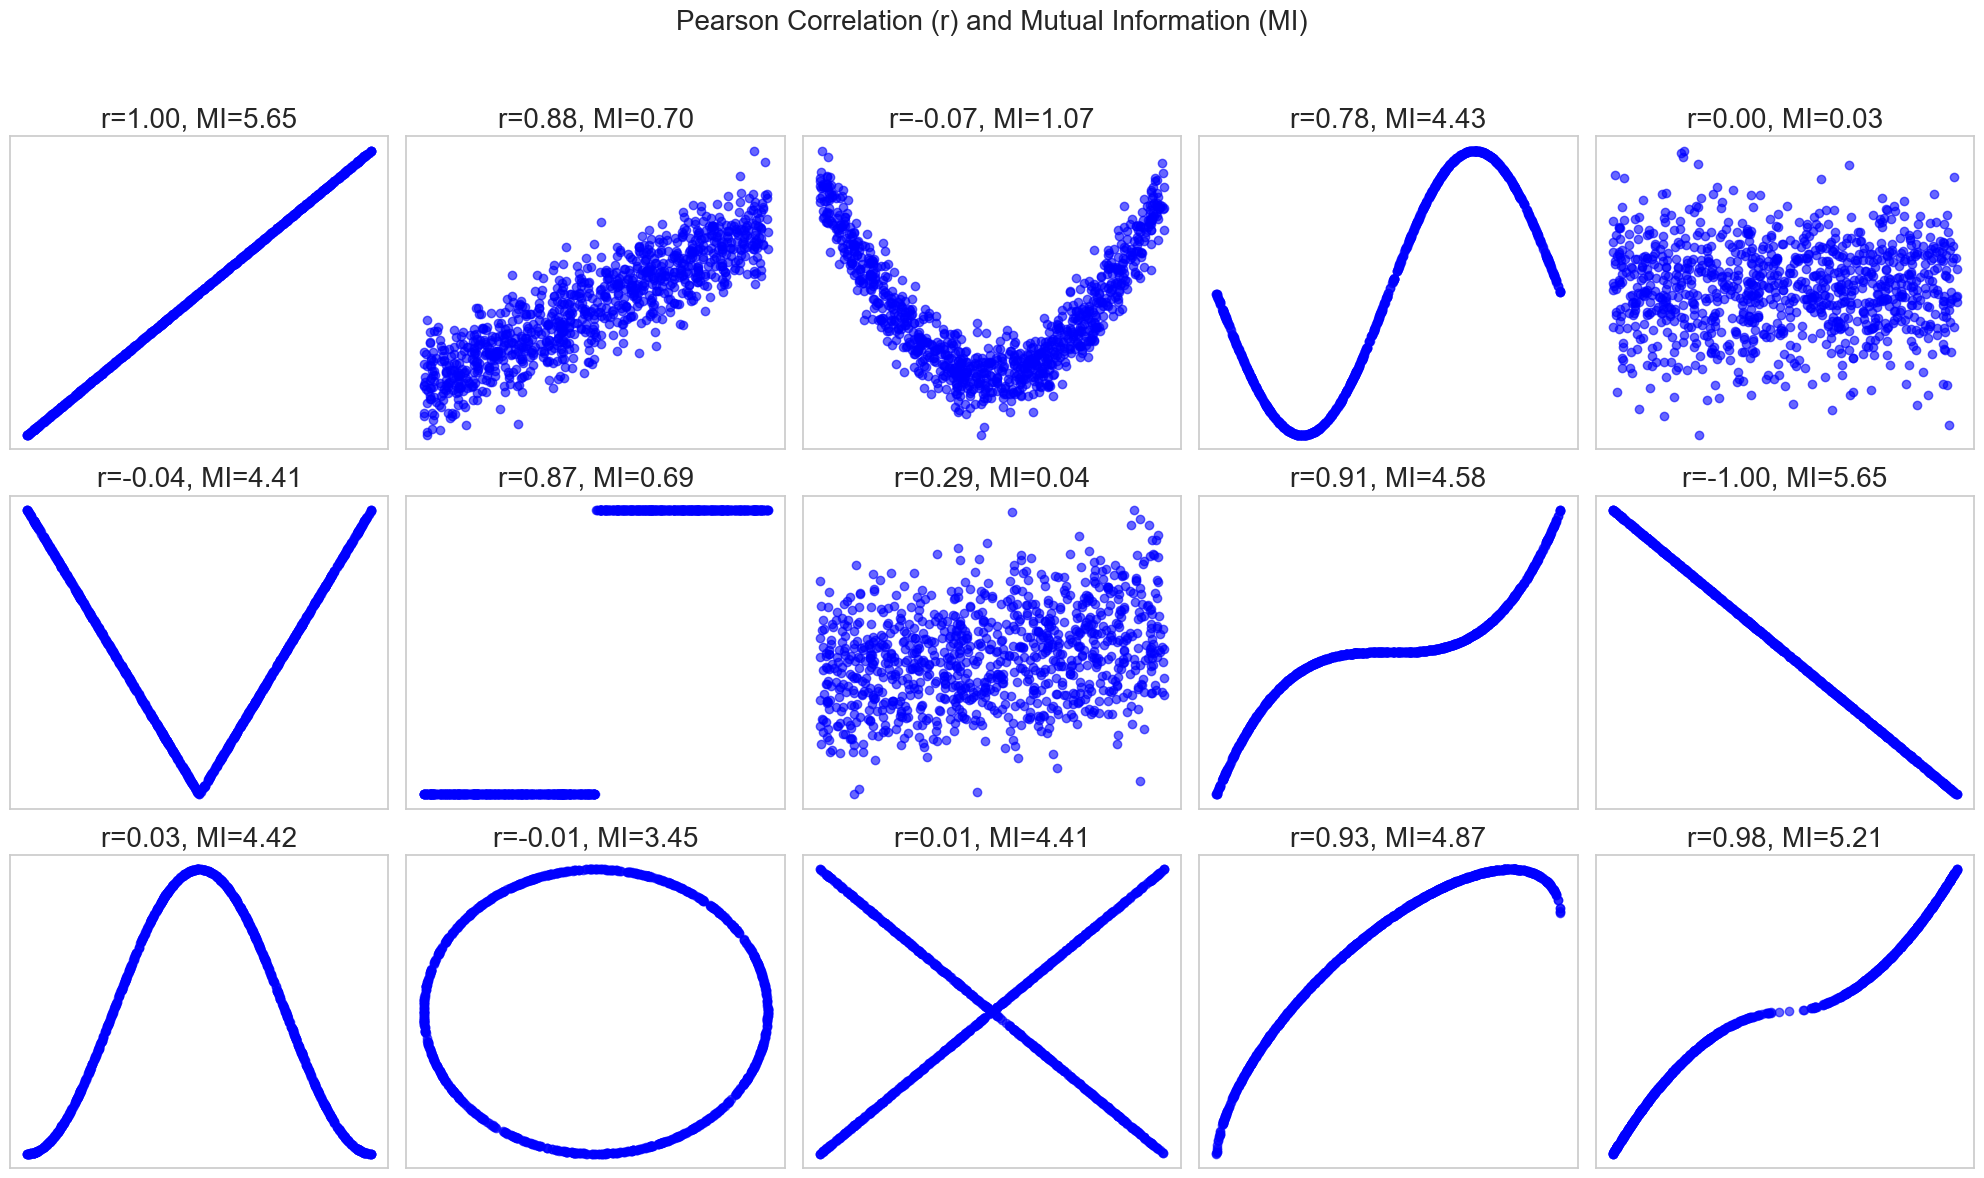

In [14]:
# Prepare datasets
datasets = make_data()
n_total = len(datasets)
n_cols = 5
n_rows = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))

for i, (x, y) in enumerate(datasets):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    
    # Compute metrics
    pearson, mi = compute_metrics(x, y)
    
    # Plot
    ax.scatter(x, y, color='blue', alpha=0.6)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"r={pearson:.2f}, MI={mi:.2f}", fontsize=20)
    ax.grid(True)

# Remove empty plots if any
for i in range(n_total, n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    fig.delaxes(axes[row, col])

plt.suptitle("Pearson Correlation (r) and Mutual Information (MI)", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.grid(True)
plt.show()